In [ ]:
pip install imbalanced-learn

In [55]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import lightgbm as lgbm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

                                        Data Preprocessing

In [64]:
dataset = pd.read_csv("dataset/Bank Customer Churn Prediction.csv")

In [65]:
dataset.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [66]:
dataset.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [67]:
dataset["country"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [68]:
dataset.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [69]:
X = dataset.drop("churn", axis = 1)
y = dataset["churn"]
X.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [70]:
y.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

Observations:
    • There are no missing values. 
    • There are some categorical features and they are:
        o Gender
        o Country
        o products_number (this feature is been considered a categorical feature because of its low cardinality)
        o credit_card (this feature is been considered a categorical feature because of its low cardinality)
        o active_member (this feature is been considered a categorical feature because of its low cardinality)
    • credit_score, age and estimated_salary appears to be normally distributed given how close the mean and median (50%) are.
    • looking at the mean and medain of balance, balance appears to be skewed to the left as mean is much smaller than the median.
    • The customer_id is of no value to us as each rows has a unique value and will be dropped.
    • The dataset is imbalanced.

In [71]:
#delete columns in the dataset that are not needed.
X.drop("customer_id", axis =1, inplace = True)

                                        Exploratory Data Analysis

Text(0.5, 1.0, "customer's credit_score")

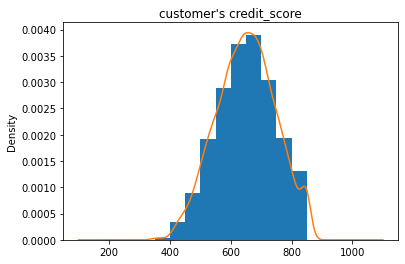

In [72]:
fig, ax = plt.subplots(figsize = (6,4))
X["credit_score"].plot(kind = "hist", density = True)
X["credit_score"].plot(kind = "kde")
ax.set_title("customer's credit_score")

Text(0.5, 1.0, "customer's age")

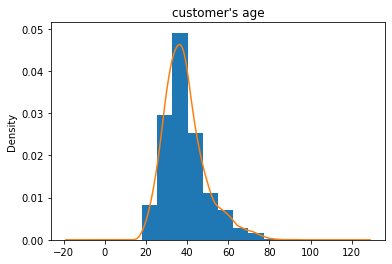

In [73]:
fig, ax = plt.subplots(figsize = (6,4))
X["age"].plot(kind = "hist", density = True)
X["age"].plot(kind = "kde")
ax.set_title("customer's age")

Text(0.5, 1.0, "customer's estimated_salary")

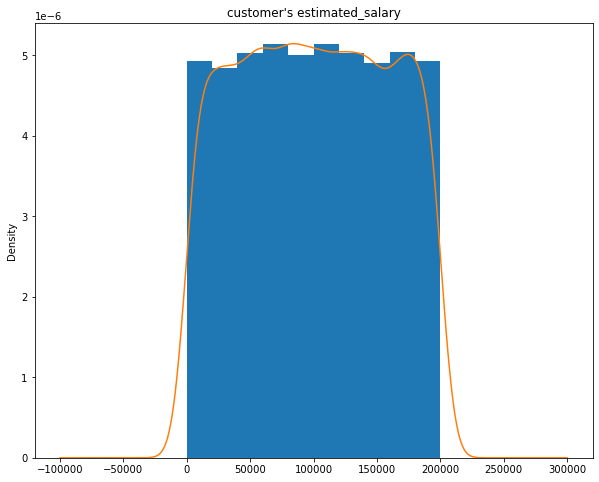

In [74]:
fig, ax = plt.subplots(figsize = (10,8))
X["estimated_salary"].plot(kind = "hist", density = True)
X["estimated_salary"].plot(kind = "kde")
ax.set_title("customer's estimated_salary")

Text(0.5, 1.0, "customer's balance")

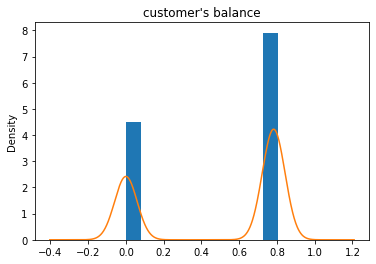

In [82]:
fig, ax = plt.subplots(figsize = (6,4))
X["balance"].plot(kind = "hist", density = True)
X["balance"].plot(kind = "kde")
ax.set_title("customer's balance")

Observations:
    • our intinatial observation about estimated_salary, balance, credit_score looks correct (normally distributed). However, age is skewed to the right.

                                        Feature Engineering

Looking at the features i determined that two new features may help our model and they are. 
    • age group
    • credit score group i.e dividing credit scores in good, avarage and bad.

In [76]:
bins = [300, 579, 669, 739, 799, 850]
labels = [5, 4, 3, 2, 1]
X["credit_score_rating"] = pd.cut(X["credit_score"], bins = bins, labels=labels)

In [77]:
bins = [18, 34, 50, 69, 92]
labels = [1, 2, 3, 4]
X["age_group"] = pd.cut(X["age"], bins = bins, labels=labels)

In [78]:
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,credit_score_rating,age_group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,4,2
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,4,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,5,2
3,699,France,Female,39,1,0.00,2,0,0,93826.63,3,2
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,2,2
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,5,2
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,3,2
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,2,2


In [79]:
OE = ["country", "gender"]
ordinalEncoder = OrdinalEncoder()
X[OE] = ordinalEncoder.fit_transform(X[OE])

In [80]:
imbalanced_dataset = ["balance", "age"]
for i in imbalanced_dataset:
    X[imbalanced_dataset] = np.log10(X[imbalanced_dataset]+1)

In [81]:
X.corr()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
credit_score,1.000000,0.007888,-0.002857,-0.006793,0.000842,0.008273,0.012238,-0.005458,0.025651,-0.001384
country,0.007888,1.000000,0.004719,0.024136,0.003739,0.075812,0.003972,-0.008523,0.006724,-0.001369
gender,-0.002857,0.004719,1.000000,-0.027250,0.014733,0.004939,-0.021859,0.005766,0.022544,-0.008112
age,-0.006793,0.024136,-0.027250,1.000000,-0.011335,0.037537,-0.029786,-0.011560,0.062066,-0.006122
tenure,0.000842,0.003739,0.014733,-0.011335,1.000000,-0.015093,0.013444,0.022583,-0.028362,0.007784
balance,0.008273,0.075812,0.004939,0.037537,-0.015093,1.000000,-0.329302,-0.018280,-0.004419,0.014415
products_number,0.012238,0.003972,-0.021859,-0.029786,0.013444,-0.329302,1.000000,0.003183,0.009612,0.014204
credit_card,-0.005458,-0.008523,0.005766,-0.011560,0.022583,-0.018280,0.003183,1.000000,-0.011866,-0.009933
active_member,0.025651,0.006724,0.022544,0.062066,-0.028362,-0.004419,0.009612,-0.011866,1.000000,-0.011421
estimated_salary,-0.001384,-0.001369,-0.008112,-0.006122,0.007784,0.014415,0.014204,-0.009933,-0.011421,1.000000


In [86]:
to_scale = ["credit_score", "age", "balance", "estimated_salary", "tenure"]
scaler  = StandardScaler()
X[to_scale] = scaler.fit_transform(X[to_scale])

Given that the dataset is imbalanced i will use random undersampling 

In [87]:
undersample = RandomUnderSampler(sampling_strategy = "majority")
X_under, y_under = undersample.fit_resample(X, y)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.3, random_state = 1)

In [89]:
lg = lgbm.LGBMClassifier()
lg.fit(X_train, y_train)
lgResult = lg.predict(X_test)
print(accuracy_score(y_test, lgResult))
print(classification_report(y_test, lgResult))
print(confusion_matrix(y_test, lgResult))

0.785772690106296
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       622
           1       0.80      0.76      0.78       601

    accuracy                           0.79      1223
   macro avg       0.79      0.79      0.79      1223
weighted avg       0.79      0.79      0.79      1223

[[506 116]
 [146 455]]


In [93]:
X_train

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2054,750,2.0,1.0,22,3,121681.82,1,1,0,128643.35
3279,748,0.0,0.0,39,9,132865.56,1,1,1,59636.43
1783,584,0.0,1.0,28,10,0.00,2,1,0,19834.32
2935,502,1.0,0.0,42,0,132002.70,1,0,1,28204.98
146,674,2.0,1.0,36,2,0.00,2,1,1,182787.17
...,...,...,...,...,...,...,...,...,...,...
3839,443,0.0,0.0,35,9,108308.00,1,1,0,129031.19
1096,601,0.0,1.0,40,10,98627.13,2,0,0,77977.69
3980,608,2.0,1.0,45,4,0.00,2,0,0,36697.48
235,682,0.0,0.0,48,7,0.00,2,1,0,65069.03
